#  Логи магазина

В файле `walmart.csv` нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.

__а)__ Подгрузите все необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__б)__ Загрузите файл с данными. Отобразите первые и последние 5 наблюдений. Выведите на экран тип колонок. Приведите колонку `Date` к формату даты. В переменную `ans1` запишите число строк, которое есть в таблице. 

In [2]:
walmart_df = pd.read_csv('walmart.csv')

In [3]:
walmart_df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418239 entries, 0 to 418238
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         418239 non-null  int64  
 1   Date          418239 non-null  object 
 2   Dept          418239 non-null  int64  
 3   Weekly_Sales  418239 non-null  float64
 4   IsHoliday     418239 non-null  bool   
 5   Type          418239 non-null  object 
 6   Size          418239 non-null  int64  
 7   Temperature   418239 non-null  float64
 8   Fuel_Price    418239 non-null  float64
 9   MarkDown1     147484 non-null  float64
 10  MarkDown2     108144 non-null  float64
 11  MarkDown3     134568 non-null  float64
 12  MarkDown4     132315 non-null  float64
 13  MarkDown5     148182 non-null  float64
 14  CPI           418239 non-null  float64
 15  Unemployment  418239 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.3+ MB


In [5]:
walmart_df.Date = walmart_df.Date.astype("datetime64")

In [6]:
ans1 = walmart_df.shape[0]

In [7]:
# проверка, что задание решено корректно
assert ans1 > 418000

# Подобные тесты скрыты от вас 

__в)__ Разберитесь с пропущенными переменными: 

- Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
- Визуализируйте пропуски с помощью функции `sns.heatmap`. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные $10\%$ наблюдений из исходной таблички методом `.sample( )` и визуализируйте их. 
- Запишите в переменную `ans2` число переменных, которые имеют более $60\%$ пропусков.
- Удалите эти переменные из набора данных.

In [8]:
walmart_sample_df = walmart_df.sample(int(0.1*len(walmart_df)))
walmart_sample_df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
308758,32,2010-11-05,67,6543.04,False,A,203007,49.20,2.729,NaN,NaN,NaN,NaN,NaN,190.996438,9.137
41879,5,2011-03-11,19,48.00,False,B,34875,55.74,3.459,NaN,NaN,NaN,NaN,NaN,214.672990,6.634
389629,42,2011-07-29,13,13580.19,False,C,39690,86.75,3.694,NaN,NaN,NaN,NaN,NaN,129.167710,8.257
213616,22,2010-08-20,83,1353.01,False,B,119557,73.21,2.796,NaN,NaN,NaN,NaN,NaN,136.524918,8.433
177693,19,2010-10-01,14,16896.18,False,A,203819,59.91,2.840,NaN,NaN,NaN,NaN,NaN,132.756800,8.067


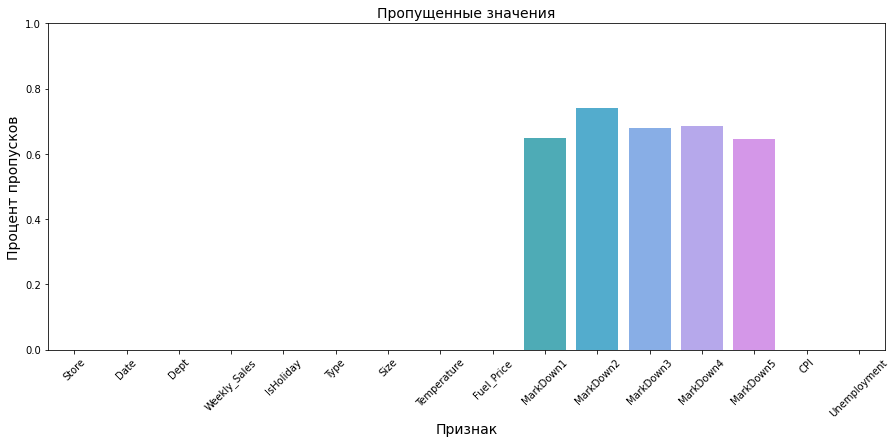

In [9]:
skip_data = walmart_sample_df.isna().sum()/len(walmart_sample_df)

plt.figure(figsize=(15, 6))
sns.barplot(x=skip_data.index, y=skip_data.values)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.title('Пропущенные значения', fontsize=14)
plt.xlabel('Признак', fontsize=14)
plt.ylabel('Процент пропусков', fontsize=14)
plt.show()

In [10]:
ans2 = (skip_data.values > 0.6).sum()

In [11]:
# проверка, что задание решено корректно
assert ans2 > 4
assert ans2 < 10

# Подобные тесты скрыты от вас 

__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`. 

In [12]:
ans3 = len(walmart_df.Store.unique())
ans4 = len(walmart_df.Dept.unique())
ans5 = (walmart_df.Date.max() - walmart_df.Date.min()).days

In [13]:
# проверка, что задание решено корректно
assert ans3 < 50
assert ans4 > 80
assert ans5 > 900

# Подобные тесты скрыты от вас 

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart. Обязательно подпишите у графика оси. В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.

Насколько хорошо идут дела у магазинов? Есть ли в динамике продаж какие-то интересные особенности? Как думаете, с чем они связаны? 

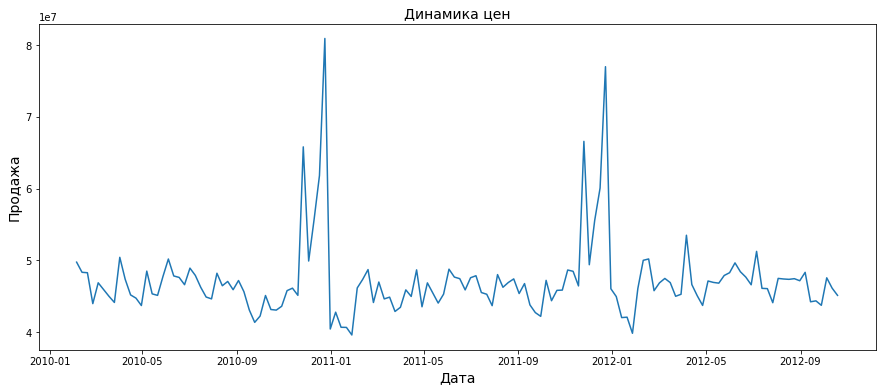

In [14]:
data_sales_group = walmart_df.groupby('Date')['Weekly_Sales'].agg('sum')

plt.figure(figsize=(15, 6))
sns.lineplot(x=data_sales_group.index, y=data_sales_group.values)
plt.title('Динамика цен', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Продажа', fontsize=14)
plt.show()

In [15]:
max_sale_index = data_sales_group.argmax()

ans6 = str(data_sales_group.index[max_sale_index].date())

In [16]:
# проверка, что задание решено корректно
assert ans6.split('-')[-1] == '24'

# Подобные тесты скрыты от вас 

__е)__ Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную `ans7` (корреляция мб отрицательной). 

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.

Обратите отдельное внимание на знак корреляции между безработицей (Unemployment) и индексом потребительских цен (CPI). Про него в конце тетрадки вас ждёт отдельная история.

Text(0.5, 1.0, 'Корреляции признаков')

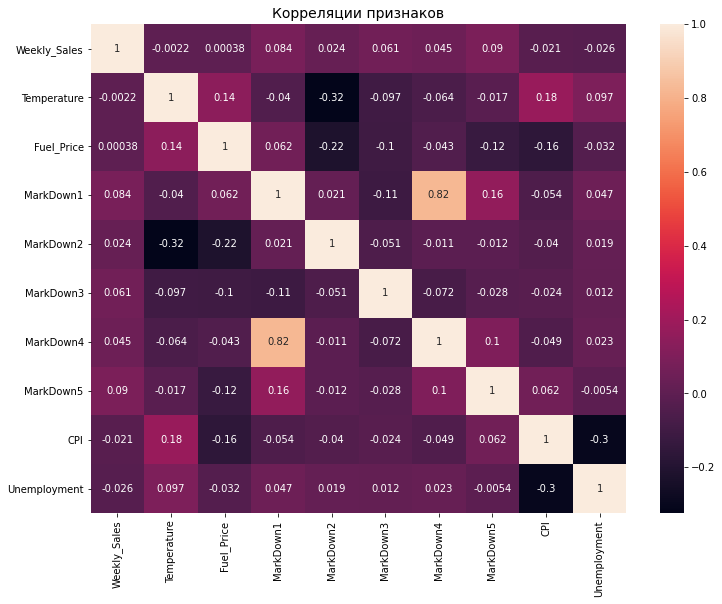

In [134]:
plt.figure(figsize=(12, 9))
walmart_corr = walmart_df.drop(['Store', 'Dept', 'Size', 'IsHoliday'], axis=1).corr()
sns.heatmap(walmart_corr, annot=True)
plt.title("Корреляции признаков", fontsize=14)

In [132]:
ans7 = np.max(np.where(np.abs(walmart_corr.values)<0.8, np.abs(walmart_corr.values), 0))
ans7

0.32441977667368177

Постройте между этими же переменными облака рассеивания методом `sns.pairplot`. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные $10\%$ наблюдений для картинки с помощью метода `.sample( )`.

- Как думате, между какими переменными в данных присутствует нелинейная взаимосвязь? 
- Как думаете, какое распределение у цен? Как бы вы его нормализовали, если бы вам это понадобилось? 

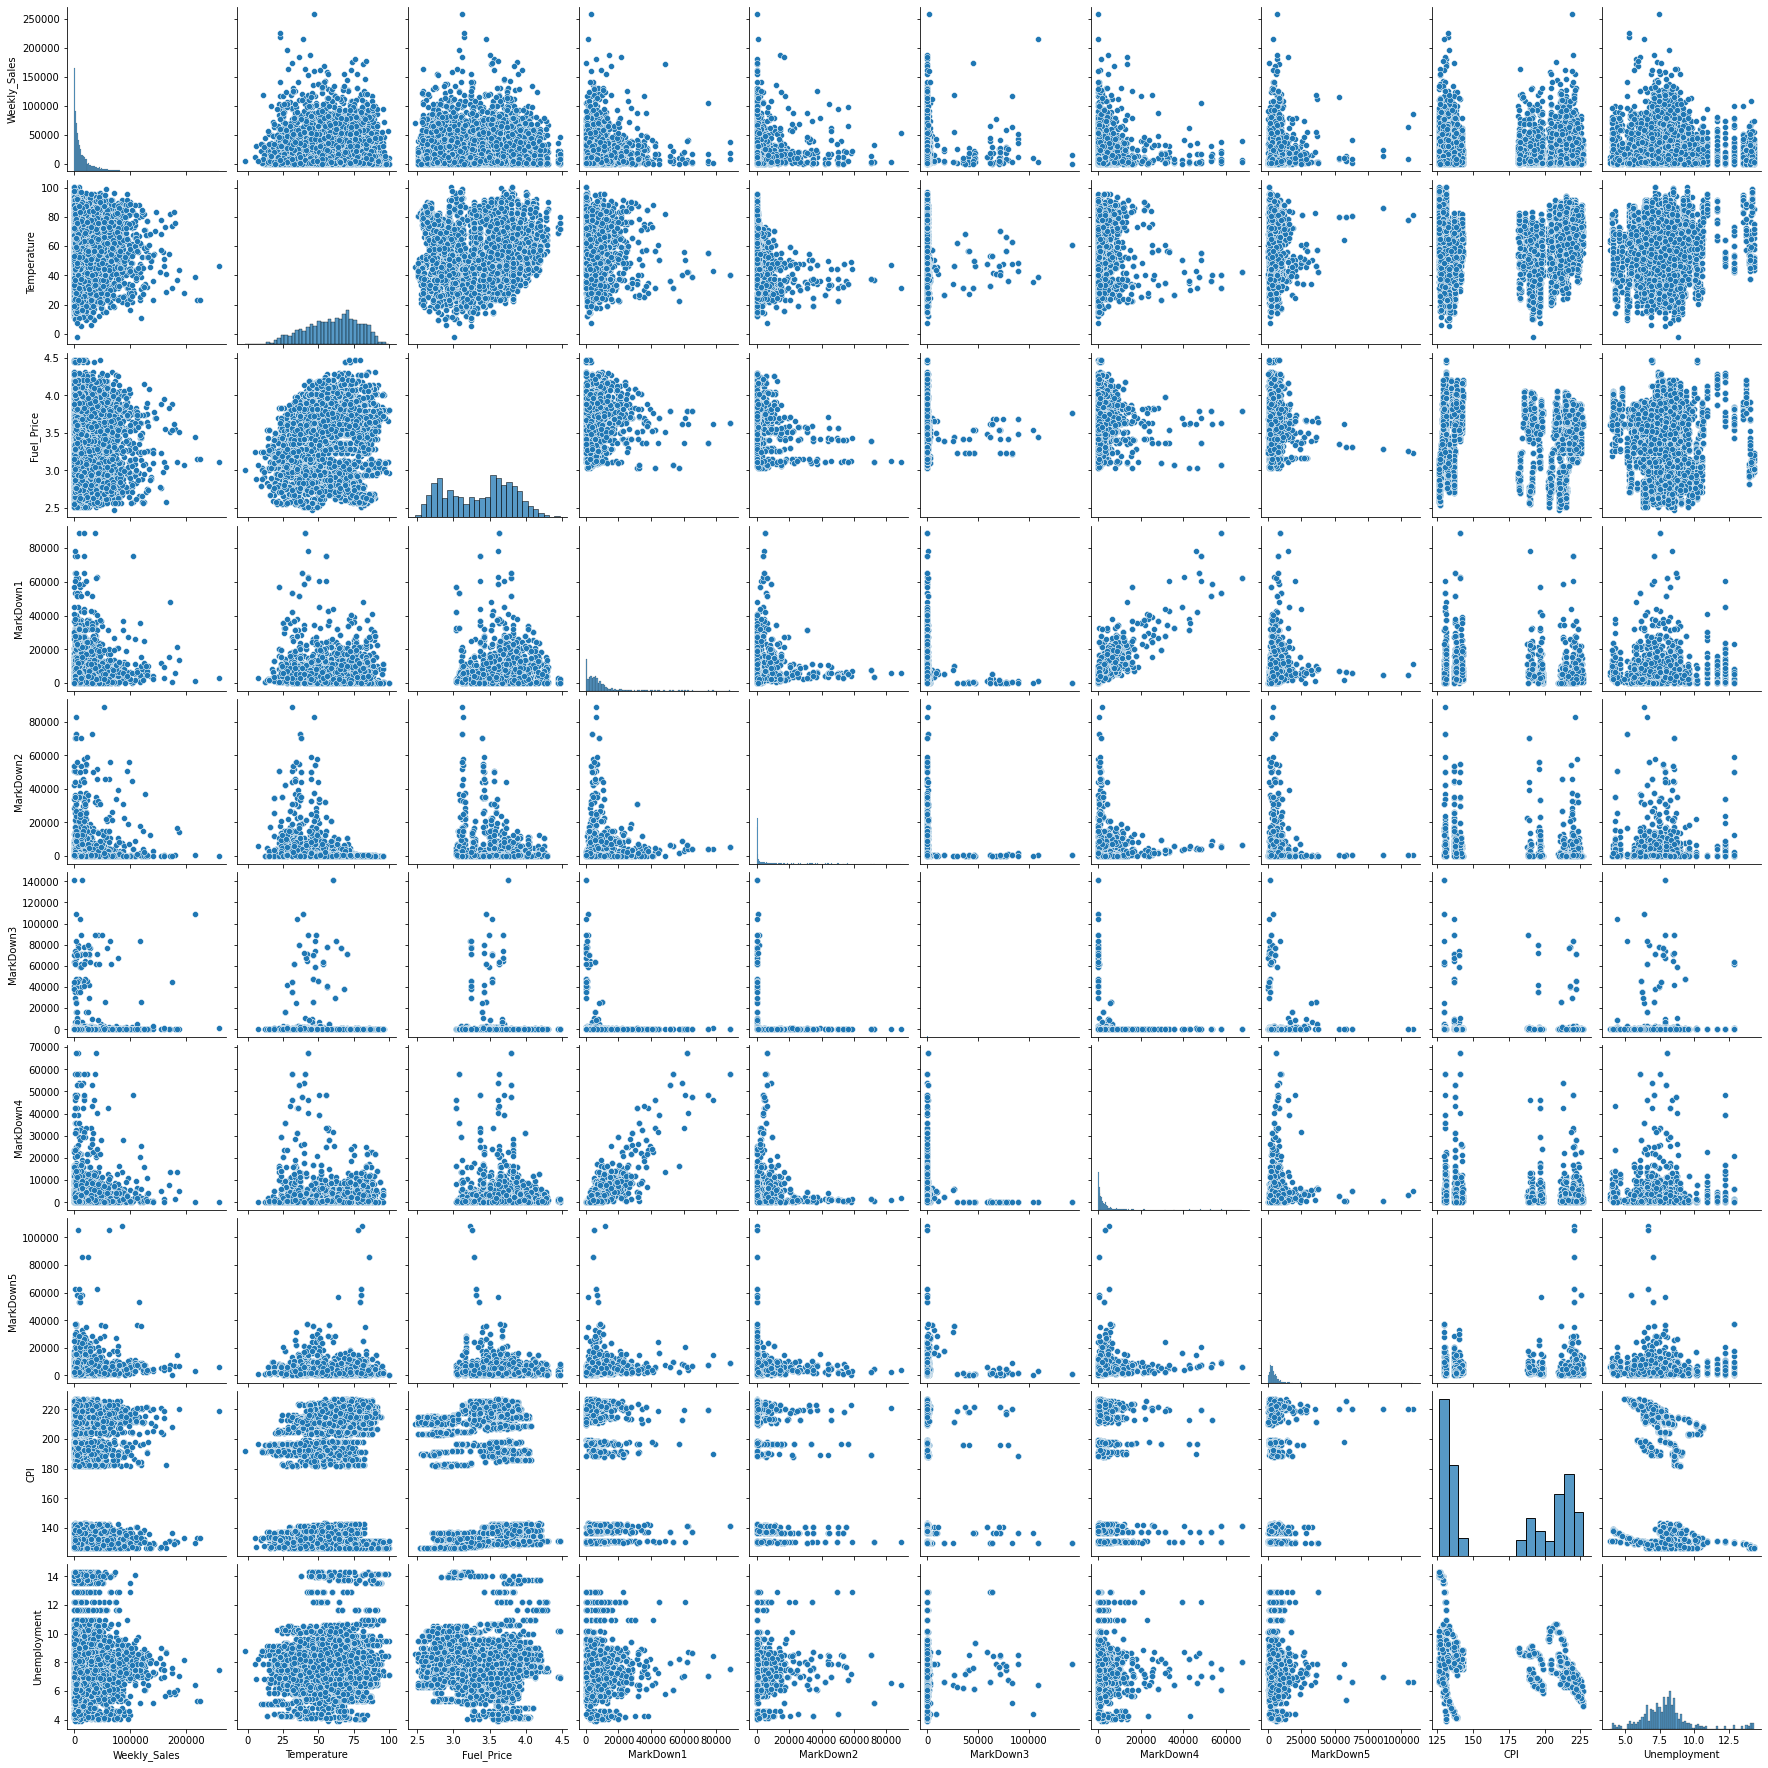

In [136]:
sns.pairplot(data=walmart_df.drop(['Store', 'Dept', 'Size', 'IsHoliday'], axis=1).sample(10000))

In [137]:
# проверка, что задание решено корректно
assert ans7 > 0.2
assert ans7 < 0.35

# Подобные тесты скрыты от вас 

__ё)__  Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике. Правда ли, что пик продаж у них происходит примерно в одно время? Как думаете, с чем связан этот пик? 

In [65]:
stores = walmart_df.groupby('Store')['Weekly_Sales'].agg('sum')
top5_stores = stores.sort_values(ascending=False)[:5]
top5_stores

Store
20    2.993660e+08
4     2.973940e+08
14    2.872952e+08
13    2.844811e+08
2     2.735476e+08
Name: Weekly_Sales, dtype: float64

In [116]:
stores_df_list = []
for store in top5_stores.index:
    stores_df_list.append(walmart_df[walmart_df.Store == int(store)][['Store', 'Weekly_Sales', 'Date']])

top5_stores_df = pd.concat(stores_df_list)

Text(0, 0.5, 'Продажи')

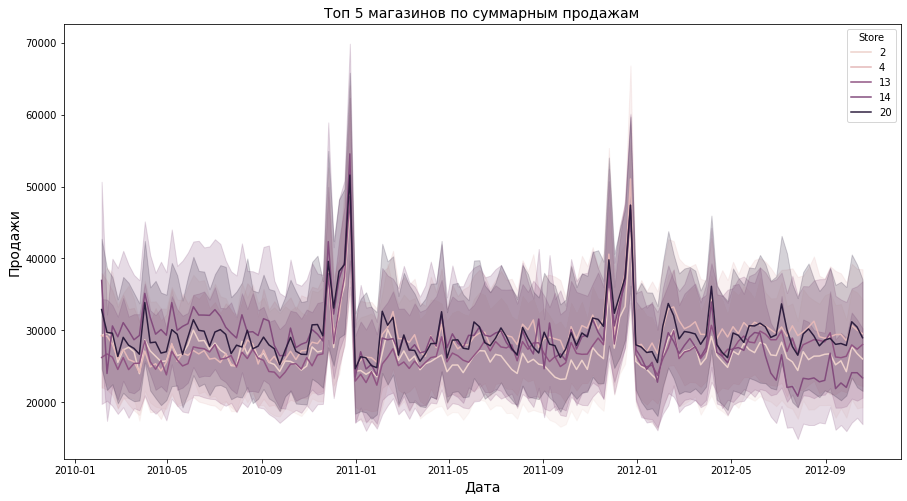

In [121]:
plt.figure(figsize=(15, 8))
sns.color_palette("hls", 5)
sns.lineplot(x='Date', y='Weekly_Sales', data=top5_stores_df, hue='Store')
plt.title("Топ 5 магазинов по суммарным продажам", fontsize=14)
plt.xlabel("Дата", fontsize=14)
plt.ylabel("Продажи", fontsize=14)

In [126]:
top5_stores_df.groupby('Date')['Weekly_Sales'].agg('mean').sort_values(ascending=False)[:2]

Date
2010-12-24    50260.382687
2011-12-23    47233.600082
Name: Weekly_Sales, dtype: float64

Самые прибыльные недели были перед новым годом!

__ж)__ Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них.

In [60]:
walmart_2011_df = walmart_df[walmart_df.Date.apply(lambda date: date.year) == 2011]
walmart_2011_A_df = walmart_2011_df[walmart_2011_df.Type == 'A']
depts = walmart_2011_A_df.groupby('Dept')['Weekly_Sales'].agg('sum')
top10_depts = depts.sort_values(ascending=False)[:10]

Text(0, 0.5, 'Суммарные продажи')

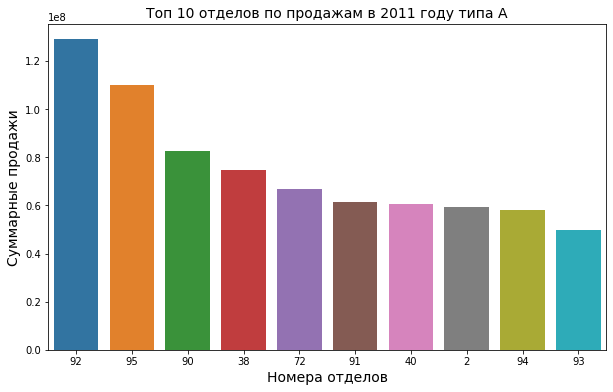

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_depts.index, y=top10_depts.values, order=top10_depts.index)
plt.title('Топ 10 отделов по продажам в 2011 году типа А', fontsize=14)
plt.xlabel('Номера отделов', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)

# Бонусная история про анализ данных и ошибки, которые мы при нём совершаем

Помните, когда мы смотрели на корреляционную матрицу, мы увидели, что между безработицей и инфляцией есть отрицательная взаимосвязь: чем больше безработица, тем ниже инфляция. В экономике эта взаимосвязь называется кривой Филиппса. И за ней кроется очень интересная история из целой плеяды ошибок. Давайте попробуем научиться на чужих ошибках чему-нибудь новому. 

В $1958$ году была опубликована статья экономиста Филиппса, в которой он обнаружил достаточно чёткую отрицательную связь между инфляцией и безработицей в Англии за прошедшие $70$ лет. Проверка этой работы на американских данных подтвердила наличие взаимосвязи. Так родилась знаменитая кривая Филиппса. Её стали интерпретировать как некую возможность выбора между высокой инфляцией и высокой безработицей. Нужно сократить безработицу? Давайте напечатаем денег и разгоним инфляцию!

Любому политику безработица кажется более значимой социальной проблемой, нежели инфляция, и он хочет её победить любыми доступными средствами. Самым популярным средством по борьбе с безработицей является агрессивная монетарная политика, которая состоит в расширении денежной массы. Грубо говоря, просто печатают ещё денег. Именно это и было сделано президентом США Ричардом Никсоном в начале $1970$-х гг. в ходе погони за низкой безработицей и высокой инфляцией.

К сожалению, план Никсона удался только наполовину, он добился высокой инфляции, но сбить безработицу не смог. В краткосрочном периоде она действительно упала, но через некоторое время вернулась назад. Кривая Филиппса в этот период времени исчезла из данных. Никакой взаимосвязи между безработицей и инфляцией больше не прослеживалось.

В течение $70$-х все Западные страны поэкспериментировали с кривой Филиппса. В конечном итоге, $1980$-е годы были потрачены на обуздание разогнанной инфляции. Победа над инфляцией обошлась довольно дорого. Например, Пол Волкер, возглавлявший в этот период времени ФРС США, взвинтил процентную ставку до $19\%$. Высокие ставки отправили экономику в рецессию. Такая жёсткая принципиальная политика ФРС позволила сбить инфляционные ожидания.

__Какова мораль этой истории?__ Политики увидели в данных закономерность, но начав бороться с безработицей, печатая деньги, немного перепутали причину и следствие. На самом деле никакой чёткой отрицательной зависимости между инфляцией и безработицей в природе не существует. Её наличие в данных является следствием сложного взаимодействия между экономическими агентами. Политики пытавшись воздействовать на следствие, а не на причину, из-за этого у них не получилось достичь своих целей.

Не путайте причину и следствие, когда смотрите в данные и помните, что работа с ними малость сложнее, чем кажется на первый взгляд.